# Raking in the Ratings: IMDB Top 1000 data Analysis 

* Our project is to uncover patterns in the top 1000 rated IMDB movies and TV shows. We'll examine the following relationships:
    * Does runtime affect IMDB ratings of the IMDB top 1000?
    * Do Gross Earnings affect IMDB ratings of the IMDB top 1000?
    * Is there a significant difference in the IMDB top 1000 ratings between U certifiactes and UA certificates.
    
Our population consists of only the top 1000 rated titles on IMDB, and does not represent all titles in IMDB. Our data is not uniformly distributed, since titles with IMDB rating lower than 7.6 are not included in the data. Therefore, assumpotions made in our anaylisis only apply to titles with higher overall viewer sentiment. 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [25]:
 # Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/IMDB_Clean.csv"
movie_df = pd.read_csv(csv_path)

movie_df.head()


,Title,Release Year,Certificate,Runtime,Genre,IMDB Rating,Meta Score,Director,Gross Earnings
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,4360000


In [26]:
movie_df.dropna()
movie_df.agg({'Runtime' : ['mean', 'min', 'max', 'median'], 'Gross Earnings' : ['mean', 'min', 'max', 'median']})



,Runtime,Gross Earnings
mean,123.715686,7.851359e+07
min,72.000000,1.305000e+03
max,238.000000,9.366622e+08
median,120.000000,3.485015e+07


### IMDB Rating vs. Runtime





* We found that the best measure of central tendency for the runtime data is the median, because the data is skewed left.

* The median runtime for all movies is 120 minutes. 




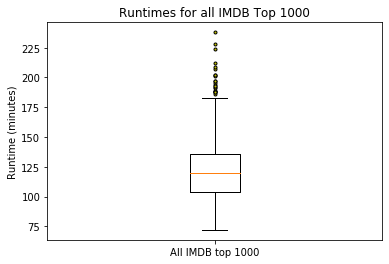

In [27]:
green_diamond = dict(markerfacecolor='y', marker='.')
data=[movie_df['Runtime']]

plt.boxplot(data,flierprops=green_diamond)

plt.title('Runtimes for all IMDB Top 1000')
plt.ylabel('Runtime (minutes)')


plt.xticks(ticks=[1],labels=['All IMDB top 1000'])
plt.yticks()


plt.savefig('Figures/01_runtimes_boxplot', dpi=100)

plt.show()


#### Does runtime affect a movie's ratings?

The pearsonr correlation coefficient for IMDB ratings and runtime for all the IMDB top 1000 is approximately .258224, which shows no significant positive or negative correlation. Additionally, the pearsonr correlation coefficient for Metascore and runtime for all the IMDB top 1000 is approximately -0.005718, which shows no significant positive or negative correlation. Therefore, we've concluded that a movie's runtime does not affect viewers' overall sentiment for the IMDB top 1000 list. 




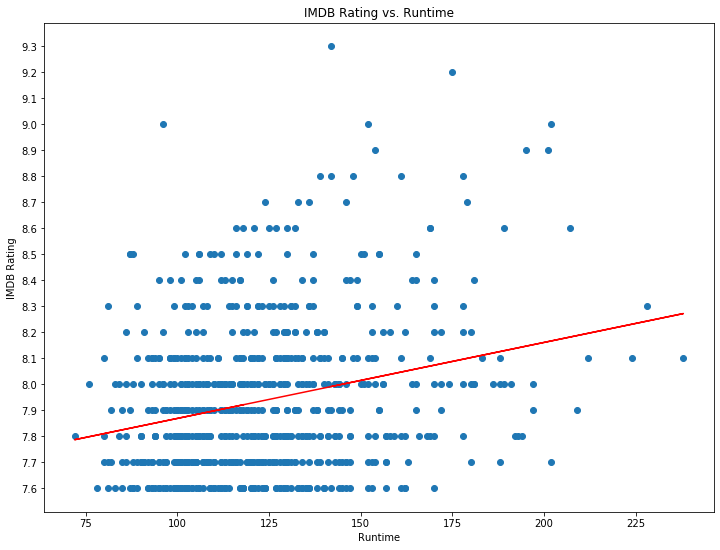

In [28]:
y= movie_df['IMDB Rating']
x= movie_df['Runtime']

plt.figure(figsize=(12,9))
plt.scatter(x, y)

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.xlabel('Runtime')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating vs. Runtime')


max=movie_df['IMDB Rating'].unique().max()
min=movie_df['IMDB Rating'].unique().min()
plt.yticks(np.arange(min,max,0.1))

plt.savefig('Figures/01_IMDB_v_Runtime_scatter', dpi=200)
plt.show()

In [29]:
r_val, p_val = stats.pearsonr(x, y)
r_val

0.25822381247916004

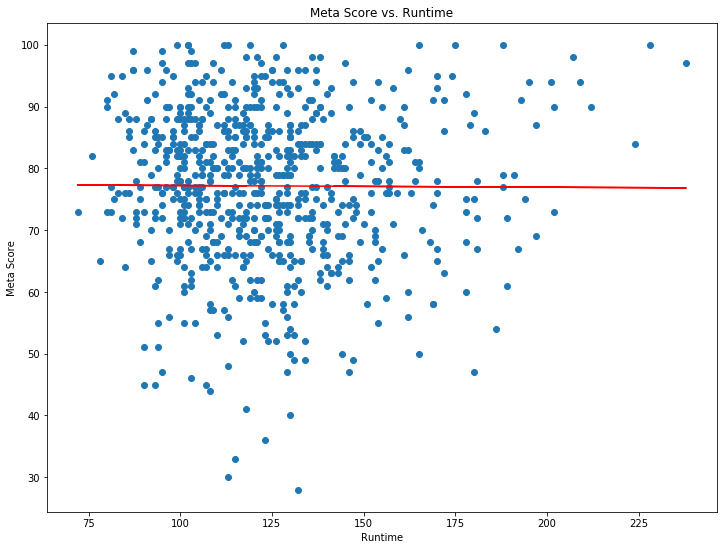

In [30]:
y= movie_df['Meta Score']
x= movie_df['Runtime']

plt.figure(figsize=(12,9))
plt.scatter(x, y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.title('Meta Score vs. Runtime')


max=movie_df['Meta Score'].unique().max()
min=movie_df['Meta Score'].unique().min()

plt.savefig('Figures/01_Meta_v_Runtime_scatter', dpi=200)

plt.show()

In [31]:
r_val, p_val = stats.pearsonr(x, y)
r_val

-0.00571814756070705

### IMDB Rating Vs. Gross Earnings
#### Does gross earnings affect a movie's IMDB rating?


* We found that the best measure of central tendency for the Gross Earnings data is the median, because the data is skewed left.

* The median gross earnings for all the IMDB top 1000 is $3,485,015.


 Median IMDB Rating: 7.9


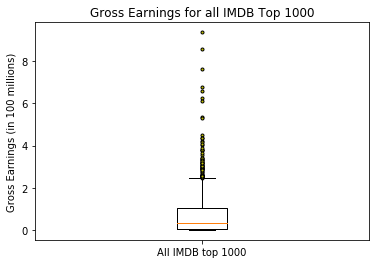

In [32]:
earnings = movie_df['Gross Earnings']/100000000


green_diamond = dict(markerfacecolor='y', marker='.')


plt.boxplot(earnings,flierprops=green_diamond)

plt.title('Gross Earnings for all IMDB Top 1000')
plt.ylabel('Gross Earnings (in 100 millions)')


plt.xticks(ticks=[1],labels=['All IMDB top 1000'])
plt.yticks()

median_imdb_rating = movie_df['IMDB Rating'].median()
print(f' Median IMDB Rating: {median_imdb_rating}')


plt.savefig('Figures/02_gross_earning_boxplot', dpi=200)
plt.show()




* We began by splitting the population into two samples; the highest IMDB ratings and lowest IMDB ratings. A box plot illustrated that the two samples had similar ranges of gross earnings. The gross earnings range for lowest IMDB ratings is \\$1,305 - \\$760,507,625, and the gross earnings range for highest IMDB ratings is \\$8,060 - \\$936,662,225.


* Next, a t-test was done to find out if a high IMDB rating is related to high gross earnings. A p-value of 0.0707467425988131 shows that there is no statistical significance, and our null hypothesis was not rejected - If a high IMDB rating is not related to gross earning, then gross earning will not be affected.




In [33]:
# split down middle of distrubution of IMDB ratings
movie_df['IMDB Rating'].median()
split_row = int(len(movie_df)/2)

upper_ratings_df = movie_df.iloc[:split_row,:]
lower_ratings_df = movie_df.iloc[split_row:,:]


In [34]:
y = lower_ratings_df['IMDB Rating']
x = lower_ratings_df['Gross Earnings']

mean_for_lower = lower_ratings_df['Gross Earnings'].mean()
mean_for_upper = upper_ratings_df['Gross Earnings'].mean()

print(f'lower mean gross: {mean_for_lower}')
print(f'upper mean gross: {mean_for_upper}')

lower mean gross: 70737950.52661064
upper mean gross: 86289219.95238096


Gross earngins Range for lowest IMDB ratings: 1305, 760507625
Gross earngins Range for highest IMDB ratings: 8060, 936662225
IMDB rating Range for lowest IMDB ratings: 7.6, 7.9
IMDB rating Range for highest IMDB ratings: 9.3, 7.9


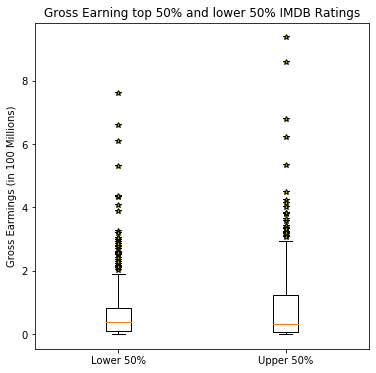

In [35]:
upper_earnings = upper_ratings_df['Gross Earnings']/100000000
lower_earnings = lower_ratings_df['Gross Earnings']/100000000
data = [lower_earnings, upper_earnings]

plt.figure(figsize=(6,6))
green_diamond = dict(markerfacecolor='y', marker='*')


plt.boxplot(data,flierprops=green_diamond)

plt.title('Gross Earning top 50% and lower 50% IMDB Ratings')
plt.ylabel('Gross Earmings (in 100 Millions)')


plt.xticks(ticks=[1,2],labels=['Lower 50%', 'Upper 50%'])
plt.yticks()


# ranges for gorss earnings 
l_max = lower_ratings_df['Gross Earnings'].max()
l_min = lower_ratings_df['Gross Earnings'].min()
print(f'Gross earngins Range for lowest IMDB ratings: {l_min}, {l_max}')
u_max = upper_ratings_df['Gross Earnings'].max()
u_min = upper_ratings_df['Gross Earnings'].min()
print(f'Gross earngins Range for highest IMDB ratings: {u_min}, {u_max}')

# ranges for ratings
l_max_rating = lower_ratings_df['IMDB Rating'].max()
l_min_rating = lower_ratings_df['IMDB Rating'].min()
print(f'IMDB rating Range for lowest IMDB ratings: {l_min_rating}, {l_max_rating}')
u_max_rating = upper_ratings_df['IMDB Rating'].max()
u_min_rating = upper_ratings_df['IMDB Rating'].min()
print(f'IMDB rating Range for highest IMDB ratings: {u_max_rating}, {u_min_rating}')


plt.savefig('Figures/02_gross_earning_split_boxplot', dpi=200)
plt.show()

###### Hypothesis test

* Alternative: If a high IMDB rating earned more money, then movies rated above 7.9 will make more than movies ratesdbelow 7.9.
* Null: If a high IMDB rating does not earned more money, then movies rated above 7.9 will not make more than movies rated below 7.9.
###### Ttest:



In [13]:
population1 = upper_earnings
population2 = lower_earnings

stats.ttest_ind(population1, population2, equal_var=False)


Ttest_indResult(statistic=1.8099326372810447, pvalue=0.0707467425988131)

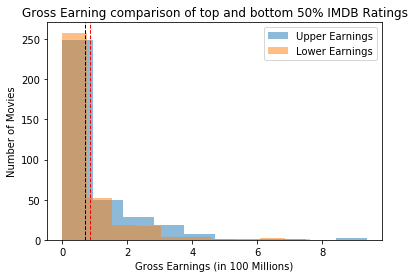

In [14]:
# Histogram Plot of Data
plt.hist(population1, 10, alpha=0.5, label="Upper Earnings")
plt.hist(population2, 10, alpha=0.5, label="Lower Earnings")
plt.axvline(population1.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.title('Gross Earning comparison of top and bottom 50% IMDB Ratings')
plt.xlabel('Gross Earnings (in 100 Millions)')
plt.ylabel('Number of Movies')


plt.savefig('Figures/02_gross_earning_split_hist', dpi=200)
plt.show()

### IMDB Rating vs. Meta Score Rating
##### Does IMDB rating align with meta score?

* The pearsonr correlation coefficient for Metascore and IMDB Rating for all the IMDB top 1000 is approximately 0.280894, which shows no significant positive or negative correlation. Therefore, we've concluded that the IMDB top 1000 ratings do not correlate with Metascore ratings. 


* Next, a t-test was done to find out if IMDB ratings are aligned with Metascore ratings. The p value for the t-test was 4.073309032496214e-06, which shows that the IMDB rating and Metascore ratings are not aligned.




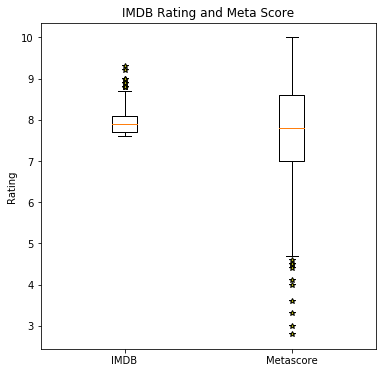

In [15]:

data = [movie_df['IMDB Rating'], movie_df['Meta Score']/10]

plt.figure(figsize=(6,6))
green_diamond = dict(markerfacecolor='y', marker='*')


plt.boxplot(data,flierprops=green_diamond)

plt.title('IMDB Rating and Meta Score')
plt.ylabel('Rating')


plt.xticks(ticks=[1,2],labels=['IMDB', 'Metascore'])
plt.yticks()
plt.savefig('Figures/03_imdb_meta_boxplot', dpi=200)
plt.show()


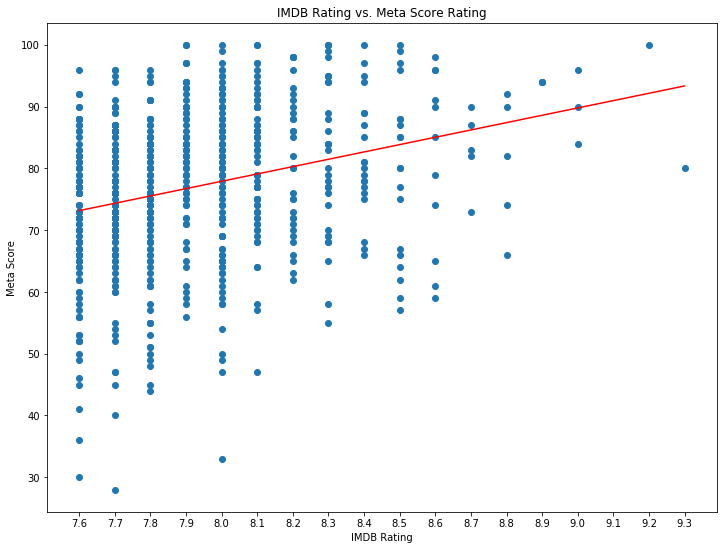

In [16]:
movie_df.dropna()

x= movie_df['IMDB Rating']
y= movie_df['Meta Score']

plt.figure(figsize=(12,9))
plt.scatter(x, y)

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('IMDB Rating vs. Meta Score Rating')

max=movie_df['IMDB Rating'].unique().max()
min=movie_df['IMDB Rating'].unique().min()
plt.xticks(np.arange(min,max,0.1))


plt.savefig('Figures/03_imdb_v_meta_scatter', dpi=200)
plt.show()


In [17]:
r_val, p_val = stats.pearsonr(x, y)
r_val

0.28089438848527865

In [18]:
population1 = movie_df['IMDB Rating']
population2 = movie_df['Meta Score']/10

stats.ttest_ind(population1, population2, equal_var=False)


Ttest_indResult(statistic=4.640116856853968, pvalue=4.073309032496214e-06)

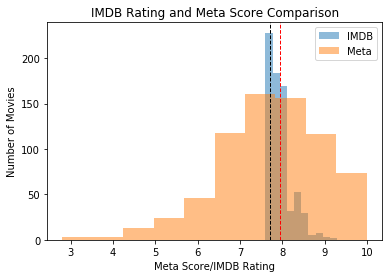

In [19]:
# Histogram Plot of Data
plt.hist(population1, 10, alpha=0.5, label="IMDB")
plt.hist(population2, 10, alpha=0.5, label="Meta")
plt.axvline(population1.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

plt.title('IMDB Rating and Meta Score Comparison')
plt.xlabel('Meta Score/IMDB Rating')
plt.ylabel('Number of Movies')


plt.savefig('Figures/03_imdb_v_meta_hist', dpi=200)
plt.show()

### A Certificate IMDB ratings Vs. UA Certificate IMDB ratings
* Do A certificates have higher IMDB ratings than UA certificates?


* We found that A certificate movies had the highest mean IMDB rating of 8.001149 and UA certificate movies had the lowest mean IMDB rating of 7.929577. We decided to use a t-test to see if the mean IMDB ratings reflected that A rated movies have better overall viewer sentiment than UA rated movies. We found a p-value of 0.04955 and rejected the null hypothesis.




##### Hypothesis test

* Alternative: If A rated movies have higher overall viewer sentiment than UA rated movies, the IMDB rating for A rated movies will be higher than the IMDB rating for UA rated movies.

* Null: If A rated movies do not have higher overall viewer sentiment than UA rated movies, the IMDB rating for A rated movies will not be higher than the IMDB rating for UA rated movies.

##### Ttest:

In [36]:
mean_rating_by_cert = movie_df.groupby(['Certificate'])['IMDB Rating'].mean()
highest_cert = mean_rating_by_cert.index[0]
highest_mean = mean_rating_by_cert[0]

lowest_cert = mean_rating_by_cert.index[len(mean_rating_by_cert)-1]
lowest_mean = mean_rating_by_cert[len(mean_rating_by_cert)-1]

print(f'Highest mean IMDB rating Certificate: {highest_cert}')
print(f'{highest_cert} mean IMDB rating: {highest_mean}')
print(f'Lowest mean IMDB rating Certificate: {lowest_cert}')
print(f'{lowest_cert} mean IMDB rating: {lowest_mean}')

Highest mean IMDB rating Certificate: A
A mean IMDB rating: 8.001149425287343
Lowest mean IMDB rating Certificate: UA
UA mean IMDB rating: 7.929577464788723


In [37]:
population1 = movie_df[movie_df['Certificate'] =='A']['IMDB Rating']
population2 = movie_df[movie_df['Certificate'] =='UA']['IMDB Rating']

stats.ttest_ind(population1, population2, equal_var=False)


Ttest_indResult(statistic=1.9714528153250883, pvalue=0.049549781805392795)

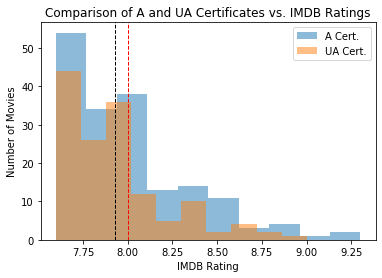

In [38]:
# Histogram Plot of Data
plt.hist(population1, 10, alpha=0.5, label="A Cert.")
plt.hist(population2, 10, alpha=0.5, label="UA Cert.")
plt.axvline(population1.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')

plt.title('Comparison of A and UA Certificates vs. IMDB Ratings')


plt.savefig('Figures/03_a_v_ua_hist', dpi=200)
plt.show()